# Regular Genomics Project **RNA Localisation**


In [5]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [6]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [9]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att1'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

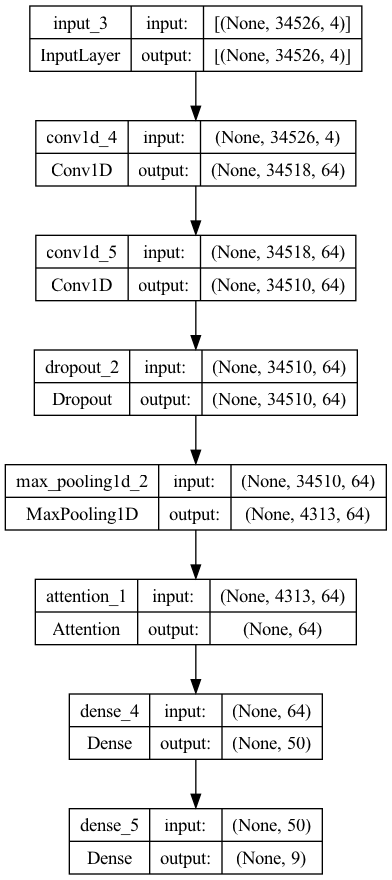

In [10]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d_4 (Conv1D)           (None, 34518, 64)         2304      
                                                                 
 conv1d_5 (Conv1D)           (None, 34510, 64)         36864     
                                                                 
 dropout_2 (Dropout)         (None, 34510, 64)         0         
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 4313, 64)          0         
 g1D)                                                            
                                                                 
 attention_1 (Attention)     (None, 64)                7920      
                                                             

In [12]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=3)])

Epoch 1/100
311/311 [==============================] - 2572s 8s/step - loss: 2.6282 - ERM: 0.1899 - KDEL: 0.2215 - LMA: 0.0117 - MITO: 0.1815 - NES: 0.0413 - NIK: 0.0262 - NLS: -0.0029 - NUCP: 0.0432 - OMM: 0.0111 - val_loss: 2.1853 - val_ERM: 0.0188 - val_KDEL: 0.0370 - val_LMA: -0.2641 - val_MITO: 0.1956 - val_NES: 0.2655 - val_NIK: -0.0363 - val_NLS: 0.3462 - val_NUCP: 0.1895 - val_OMM: -0.0638
Epoch 2/100
311/311 [==============================] - 3019s 10s/step - loss: 2.7925 - ERM: 0.1790 - KDEL: 0.0987 - LMA: -0.0190 - MITO: 0.0505 - NES: 0.0376 - NIK: 0.0480 - NLS: -0.0267 - NUCP: 0.0841 - OMM: 0.0495 - val_loss: 2.1774 - val_ERM: -0.0744 - val_KDEL: 0.0969 - val_LMA: -0.2232 - val_MITO: 0.0091 - val_NES: -0.0782 - val_NIK: 0.0689 - val_NLS: -0.0399 - val_NUCP: 0.0927 - val_OMM: -0.0920
Epoch 3/100
311/311 [==============================] - 2953s 9s/step - loss: 2.1737 - ERM: 0.2360 - KDEL: 0.1114 - LMA: -0.0430 - MITO: -0.0075 - NES: 0.0456 - NIK: -0.0409 - NLS: 0.0145 - NUCP:

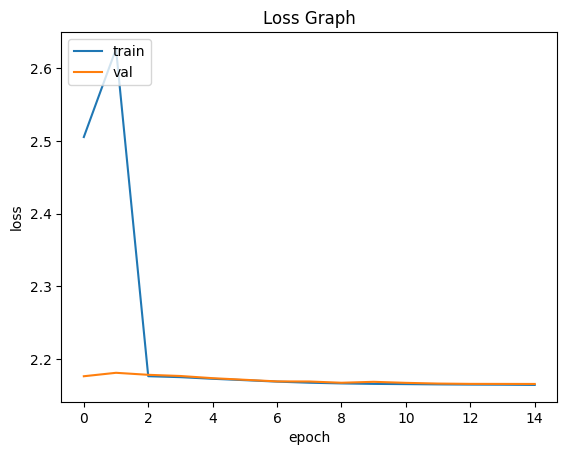

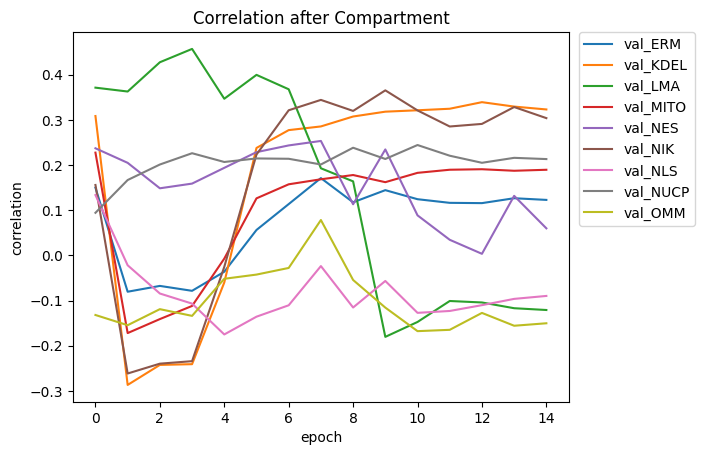

In [ ]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

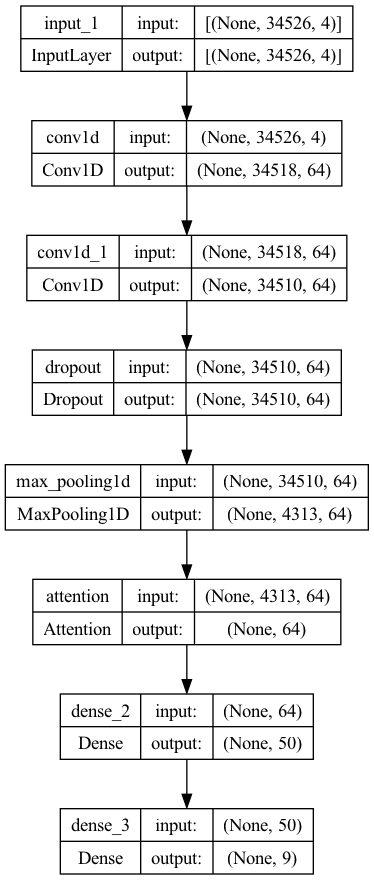

In [ ]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)